 # Import Dataset

In [1]:
import pandas as pd
import numpy as np

from cmdstanpy import CmdStanModel
import arviz as az

import matplotlib.pyplot as plt

In [2]:
with open("FeconditaFinale.csv", "rb") as f:
    dataset=pd.read_csv(f)

dataset = dataset.sort_values(by=['Territorio', 'TIME']) # the proximity matrix is built with the prov in alphabetic order

dataset

,Territorio,TIME,età.media.delle.madri.al.parto,età.media.dei.padri.alla.nascita.del.figlio,tasso.di.fecondità.totale,tasso.di.inattività.dei.maschi,tasso.di.inattività.delle.femmine,tasso.di.inattività.totale,tasso.di.occupazione.dei.maschi,tasso.di.occupazione.delle.femmine,tasso.di.occupazione.totale
930,Agrigento,2011,30.94,34.80,1.37,42.911800,75.561168,59.924924,47.392418,19.828757,33.029603
931,Agrigento,2012,30.73,34.57,1.35,43.934839,74.366121,59.780301,45.282895,20.513632,32.385627
932,Agrigento,2013,31.09,34.78,1.27,46.361107,73.567265,60.518499,43.469198,19.889053,31.198656
933,Agrigento,2014,30.99,35.06,1.33,47.098738,72.427712,60.272133,39.673492,20.296449,29.595648
934,Agrigento,2015,31.14,34.97,1.27,45.169256,75.916130,61.148536,40.057236,18.153835,28.674135
...,...,...,...,...,...,...,...,...,...,...,...
625,Viterbo,2016,31.99,35.76,1.23,39.518267,60.635768,50.408778,52.769263,32.263986,42.194134
626,Viterbo,2017,32.17,35.73,1.16,41.158020,61.241767,51.511845,51.680541,33.283508,42.195912
627,Viterbo,2018,32.05,35.64,1.20,42.945825,61.820030,52.659989,50.508888,33.458828,41.733539
628,Viterbo,2019,31.97,35.51,1.11,44.935350,63.118101,54.287825,49.777042,32.974065,41.133933


0.015125712353150588
1.3187169811320756
(106, 10)


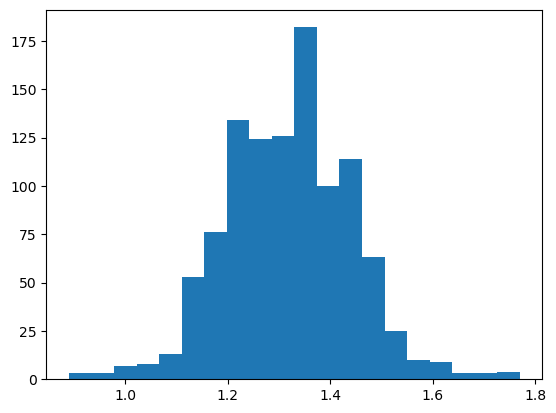

In [6]:
Y=np.array(dataset["tasso.di.fecondità.totale"])

print(np.var(Y))
print(np.mean(Y))


y = []
y_tmp = np.zeros(10)
for prov in np.unique(dataset["Territorio"]):
    data_prov = dataset[dataset["Territorio"] == prov]
    y_tmp = np.array(data_prov["tasso.di.fecondità.totale"])
    y.append(y_tmp)
y = np.array(y)
# print(y)
print(y.shape)
plt.hist(Y,bins=20)    
plt.show()

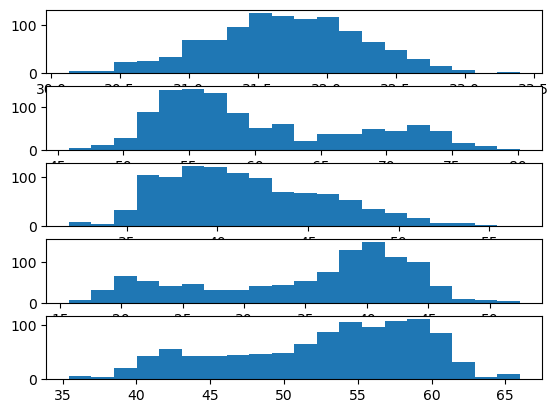

In [7]:
P = 5
X_list = []
# mega matrix with the covariates, da normalizzare forse?
X_list.append(np.array(dataset["età.media.delle.madri.al.parto"]))
# X_list.append(np.array(dataset["età.media.dei.padri.alla.nascita.del.figlio"]))
X_list.append(np.array(dataset["tasso.di.inattività.delle.femmine"]))
X_list.append(np.array(dataset["tasso.di.inattività.dei.maschi"]))
# X_list.append(np.array(dataset["tasso.di.inattività.totale"]))
X_list.append(np.array(dataset["tasso.di.occupazione.delle.femmine"]))
X_list.append(np.array(dataset["tasso.di.occupazione.dei.maschi"]))
# X_list.append(np.array(dataset["tasso.di.occupazione.totale"]))
# da valutare se vanno standardizzate
fig, axs = plt.subplots(P)

for i in range(P):
    axs[i].hist(X_list[i],bins=20)

plt.show()

In [8]:
#Standardization on X
for i in range(P):
    X_list[i] = (X_list[i]-np.mean(X_list[i])) / np.sqrt(np.var(X_list[i]))


#Standardization on Y
y= (y-np.mean(y))/np.sqrt(np.var(y))

In [9]:
X=np.ones((1060,P+1))

for i in range(P):
    X[:,i+1] = X_list[i]

X_r = np.reshape(X,(106,10,P+1))
print(X_r)
X_r.shape

[[[ 1.         -1.38733389  2.05144371  0.30656436 -1.81625192
   -0.81711788]
  [ 1.         -1.77061906  1.89211824  0.5393075  -1.7347706
   -1.14081907]
  [ 1.         -1.11355877  1.78561354  1.09128765 -1.80907835
   -1.41912648]
  ...
  [ 1.         -0.18272337  1.69594042  0.33345848 -2.07454665
   -1.43529694]
  [ 1.         -0.29223342  1.66432349  0.72523738 -1.76815191
   -1.50014603]
  [ 1.         -0.03670997  1.78846129  1.48582068 -1.84282015
   -1.66422814]]

 [[ 1.         -1.64285734 -0.34660173  0.24677987  0.51836657
    0.15248205]
  [ 1.         -1.27782385 -0.71508174 -0.21575525  0.60314497
    0.12708264]
  [ 1.         -0.73027361 -0.41062779  0.02698863  0.15451856
    0.059098  ]
  ...
  [ 1.         -0.20097504 -0.48714728 -0.31928696  0.46379505
    0.19264358]
  [ 1.          0.03629673 -0.3382982  -0.29482666  0.27341734
    0.41537872]
  [ 1.          0.10930342 -0.19435256  0.16948911  0.17544987
    0.04594432]]

 [[ 1.         -0.82153198 -0.8285012

(106, 10, 6)

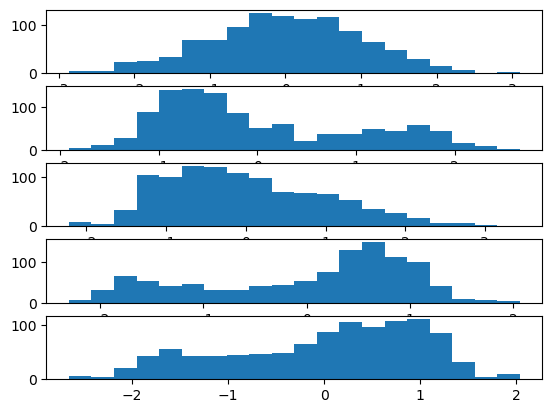

In [10]:
fig, axs = plt.subplots(P)

for i in range(P):
    axs[i].hist(X_list[i],bins=20)

plt.show()

In [11]:
I = 106
T = 10
H = 10

new_X = np.zeros((I,T,P+1))
new_Y = np.zeros((I,T))

for i in range(I):
    for t in range(T):
        new_X[i,t,:] = X_r[i,(10//T)*t,:]
        new_Y[i,t]   = y[i,(10//T)*t]

X_r = new_X
y = new_Y

# Prepare data for model

In [12]:
with open("Proximity_matrix_finale.csv", "rb") as f:
    W_raw=pd.read_csv(f)
    
W_raw=np.matrix(W_raw)

for i in range(I):
    W_raw[i,i] = 0

W_raw=np.matrix(W_raw)
Wt = W_raw.transpose()
(Wt == W_raw).all()

# compute Qinv
one_vector = np.ones(shape = (I,1))
B = np.matmul(W_raw , one_vector)  
A =  np.diagflat(np.array(B))
W_intermedia = A - W_raw


rho = 0.95
Q = rho * W_intermedia  + (1-rho) * np.eye(I)
Qinv = np.linalg.inv(Q)
# Qinv.shape
W_intermedia.shape

#Qinv must be positive definite
for i in range(I):
    for j in range(I):
        Qinv[j,i] = Qinv[i,j]

Qinv=np.matrix(Qinv)
Qinvt = Qinv.transpose()
print((Qinv == Qinvt).all())

True


# Prior predictive check 

In [52]:
from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions
np.random.seed()

# weight construction
weight = np.zeros(H)
alpha=np.random.gamma(a_alpha,b_alpha)
v = np.zeros(H)
v[0] = np.random.beta(a = 1,b = alpha)
weight[0] = v[0]
for h in range(1,H-1):
    v[h] = np.random.beta(a = 1,b = alpha)
    cumprod = np.cumprod(1 - v[0:h])[h-1]
    weight[h] = v[h]*cumprod
    
weight = weight/ np.sum(weight)
# to be chekcked

# betas construction 
betas = []
beta = np.zeros(P+1)
for h in range(H):
    beta = np.array(np.random.multivariate_normal(mean=mu_0, cov = sigma_0*np.eye(P+1)))
    betas.append(beta)
                                         
betas = np.array(betas)
                                         
# tau2
tau2 = tfd.InverseGamma(concentration = a_tau2 , scale = b_tau2).sample()
print(tau2)

xi=np.random.beta(a=a_xi,b=b_xi)
# random effects construction 
W=np.zeros((I,T))
diag_matrix_xis= xi*np.eye(I) #diag(xis)                                          
W[:,0]=np.random.multivariate_normal(mean=np.zeros(I),cov=tau2*Qinv)
for t in range(T-1):
    W[:,t+1]=np.random.multivariate_normal(mean=np.matmul(diag_matrix_xis,W[:,t]), cov=tau2*Qinv)                                        
                    
# sigma
sigma2 = tfd.InverseGamma(concentration = a_sigma2 , scale = b_sigma2).sample()                                     

# y construction 
y_p = np.zeros((I*T))                                   
for i in range(I):                                   
    for h in range(H):
        y_p[i*T:(i+1)*T] += weight[h]*np.random.multivariate_normal(mean=np.matmul(X_r[i],betas[h]) + W[i,:], cov = sigma2*np.eye(T))
fig, axs = plt.subplots(2)                                         
axs[0].hist(y_p,bins=25)
axs[1].hist(y.reshape(I*T),bins=25)   # lo voglio simile all'istogramma sopra 



In [13]:
mu_0_mean = 0*np.ones(P+1)
mu_0_var = 9
a_sigma2_0 = 3
b_sigma2_0 = 2
mu_w_1 = np.zeros(I)
a_alpha = 3
b_alpha = 3
a_tau2 = 3
b_tau2 = 0.5
a_sigma2 = 3
b_sigma2 = 1
rho = 0.95
mu_xi = 0
sigma2_xi = 4

data = {
    "I": I,
    "T": T,
    "P": P,
    "H": H,
    "y": y,
    "X": X_r,
    "mu_0_mean": mu_0_mean,
    "mu_0_var": mu_0_var,
    "a_sigma2_0": a_sigma2_0,
    "b_sigma2_0": b_sigma2_0,
    "mu_w_1": mu_w_1,
    "a_alpha": a_alpha,
    "b_alpha": b_alpha,
    "a_tau2": a_tau2,
    "b_tau2": b_tau2,
    "a_sigma2": a_sigma2,
    "b_sigma2": b_sigma2,
    "rho": rho,
    "mu_xi": mu_xi,
    "sigma2_xi": sigma2_xi,
    "inv_Q": Qinv
}

# Model

In [12]:
dp_mix_stan = """
data
{
    int I; // number of areal locations
    int T; // number of time steps
    int P; // number of covariates
    int H; // truncation of stick breaking construction dp
    
    array[I] vector[T] y; // value of interest
    array[I] matrix[T,P+1] X; // covariates matrices for each province
      
    // hyperpar vector of regressors
    vector[P+1] mu_0_mean;
    real        mu_0_var;
    real        a_sigma2_0;
    real        b_sigma2_0;
    
    // mean of w_1 (random effect for every province at time 1)
    vector[I] mu_w_1;
    
    // alpha
    real a_alpha;
    real b_alpha;
    
    // tau^2
    real a_tau2;
    real b_tau2;
    
    // sigma^2
    real a_sigma2;
    real b_sigma2;
    
    // rho 
    real rho;
    
    //xis
    real mu_xi;
    real sigma2_xi;

    // Qinv
    matrix[I,I] inv_Q;
}

transformed data {
    matrix[I, I] L;
    L = cholesky_decompose(inv_Q);
    
    real mu_0_sd;
    mu_0_sd = sqrt(mu_0_var);
    
    real sigma_xi;
    sigma_xi = sqrt(sigma2_xi);
}

parameters
{
    real<lower=0> alpha;
    real<lower=0> sigma2; 
    real<lower=0> tau2;
    
    vector[P+1]   mu_0;
    real<lower=0> sigma2_0;
    
    // autoregressive coefficient construction
    real xi;
    
    // betas for the mixture of the dirichlet process
    array[H] vector[P+1] betas; 

    // for the construction of the dirichlet process
    vector<lower=0,upper=1>[H-1] vs;
    
    // for the random effect construction 
    array[T] vector[I] w_raw;
}

transformed parameters
{   
    // weights stick breaking construction
    simplex[H] omegas; 
    
    // sbc stuff
    vector[H-1] cumprod_one_mv;    
    cumprod_one_mv = exp(cumulative_sum(log1m(vs)));
    
    omegas[1] = vs[1];
    omegas[2:(H-1)] = vs[2:(H-1)] .* cumprod_one_mv[1:(H-2)];
    omegas[H] = cumprod_one_mv[H-1];
    
    // random effects tmp
    matrix[I,T]                ws_tmp;
    
    ws_tmp[1:I,1] =  mu_w_1 + L*w_raw[1];
    
    for (t in 2:T)
        ws_tmp[1:I,t] = ws_tmp[1:I,t-1]*xi + L*w_raw[t]; 
    
    matrix[T,I]   ws = (ws_tmp)'; //otherwise I have to transpose in the for loop at each iteration
    
    // Stan wants std
    real sigma   = sqrt(sigma2);
    real tau     = sqrt(tau2);
    real sigma_0 = sqrt(sigma2_0);
}

model
{
    alpha    ~ gamma(a_alpha,b_alpha);
    sigma2   ~ inv_gamma(a_sigma2,b_sigma2);
    tau2     ~ inv_gamma(a_tau2,b_tau2);
    mu_0     ~ normal(mu_0_mean, mu_0_sd);
    sigma2_0 ~ inv_gamma(a_sigma2_0, b_sigma2_0);
    vs       ~ beta(1,alpha); 
    xi       ~ normal(mu_xi, sigma_xi);
    
    w_raw[1] ~ normal(0, tau); 
    
    for (t in 2:T)
        w_raw[t] ~ normal(0, tau);
    
    for (h in 1:H)
        betas[h] ~ normal(mu_0, sigma_0);
    
    vector[H] log_probs;
    
    for (i in 1:I) {
        
        for (h in 1:H) 
    
            log_probs[h] = log(omegas[h]) + normal_lpdf(y[i] | X[i]*betas[h] + ws[1:T,i], sigma);
        
        target += log_sum_exp(log_probs);
    }
}

generated quantities 
{   
    // vector of cluster allocations
    vector[I] s;
    
    // log likelihood for each areal location 
    vector[I] log_lik;
    
    array[I] vector[H] log_probs;
    
    for (i in 1:I) 
    {
        for (h in 1:H) 
            log_probs[i,h] = log(omegas[h]) + normal_lpdf(y[i] | X[i]*betas[h] + ws[1:T,i], sigma);
        
        s[i] = categorical_rng(softmax(log_probs[i]));
        log_lik[i] = log_sum_exp(log_probs[i]);
    }
    
        
}
"""
stan_file = "True_Dataset_mu_sigma_inc.stan"

with open(stan_file, "w") as fp:
    fp.write(dp_mix_stan)
    
dp_mix = CmdStanModel(stan_file=stan_file)

19:26:51 - cmdstanpy - INFO - compiling stan file /home/daan/bayesian-project/True_Dataset_mu_sigma_inc.stan to exe file /home/daan/bayesian-project/True_Dataset_mu_sigma_inc
19:27:14 - cmdstanpy - INFO - compiled model executable: /home/daan/bayesian-project/True_Dataset_mu_sigma_inc


In [13]:
fit = dp_mix.sample(data
                    , seed = [784,215,8955,9841]
                    , iter_warmup = 10000
                    , iter_sampling = 10000
#                     , adapt_init_phase = 500
#                     , adapt_metric_window = 1500
#                     , adapt_step_size = 1500
#                     , adapt_delta=0.9
#                     , step_size = 0.5
                    , max_treedepth = 10
#                     , show_console = True
                   )

19:27:16 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

21:31:25 - cmdstanpy - INFO - CmdStan done processing.
21:31:25 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/daan/bayesian-project/True_Dataset_mu_sigma_inc.stan', line 116, column 4 to column 30)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/daan/bayesian-project/True_Dataset_mu_sigma_inc.stan', line 116, column 4 to column 30)
Consider re-running with show_console=True if the above output is unclear!


In [1]:
fit.diagnose()

In [14]:
fit_az = az.from_cmdstanpy(fit)

In [43]:
fit_az

# Model Saving

In [14]:
s = (fit.s).astype(int)

np.savetxt("true_dataset_posterior_s.csv", s, delimiter=",")
s.shape

NameError: name 'fit' is not defined

In [17]:
np.savetxt("true_dataset_posterior_xi.csv", fit.xi, delimiter=",")
np.savetxt("true_dataset_posterior_alpha.csv", fit.alpha, delimiter=",")

In [ ]:
#Clustering on Stan

# Posterior inference

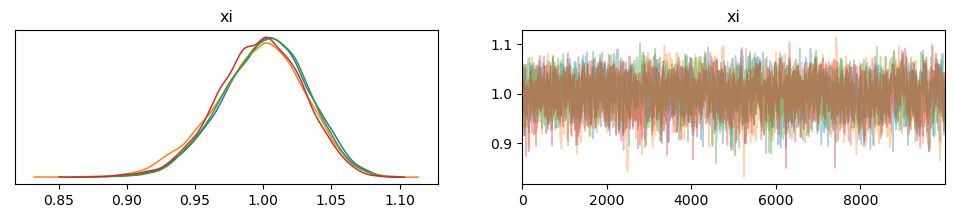

In [48]:
az.plot_trace(fit_az,var_names=["xi"],
              compact = False
             )
plt.show()

# Todo List

In [ ]:
# Salso package for clustering
# media dei beta, ci dovrebbe volere un attimo 
# media dei random effects, ci dovrebbe valere un attimo
# qualche posterior prediticve check training set/test set
# validazione modello e diagnostica mcmc, voglio che posso fidarmi di mcmc

# Credible interval, WAIC, LOO

In [21]:
# posterior credible interval per i beta ma se li vuoi anche per i random effects
hdis = az.hdi(fit, var_names=["betas"]).betas.values
hdis

array([[[-0.740808 ,  1.02729  ],
        [-0.484523 , -0.119595 ],
        [-0.300505 ,  0.597266 ],
        [-0.507643 ,  0.205964 ],
        [-0.246    ,  0.722811 ],
        [-0.521659 ,  0.351355 ]],

       [[-0.687419 ,  1.15369  ],
        [-0.557412 , -0.0485432],
        [-0.396072 ,  0.705808 ],
        [-0.593948 ,  0.254589 ],
        [-0.310815 ,  0.838046 ],
        [-0.553235 ,  0.420379 ]],

       [[-0.769769 ,  1.23119  ],
        [-0.618096 ,  0.0161406],
        [-0.419023 ,  0.844961 ],
        [-0.684901 ,  0.324087 ],
        [-0.401316 ,  0.990099 ],
        [-0.618719 ,  0.478485 ]],

       [[-0.813847 ,  1.22037  ],
        [-0.679187 ,  0.265068 ],
        [-0.519736 ,  0.896733 ],
        [-0.843524 ,  0.3226   ],
        [-0.518471 ,  0.989081 ],
        [-0.780318 ,  0.548027 ]],

       [[-0.933504 ,  1.16466  ],
        [-0.793584 ,  0.564404 ],
        [-0.669085 ,  0.918405 ],
        [-1.01426  ,  0.420198 ],
        [-0.635189 ,  1.061    ],
      

In [19]:
# computation of WAIC 
az.waic(fit, scale="deviance")

/home/daan/.local/lib/python3.10/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 40000 posterior samples and 106 observations log-likelihood matrix.

              Estimate       SE
deviance_waic   353.23    64.78
p_waic          281.34        -

There has been a warning during the calculation. Please check the results.

In [20]:
#computation of LOO
az.loo(fit)

/home/daan/.local/lib/python3.10/site-packages/arviz/stats/stats.py:1037: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/home/daan/.local/lib/python3.10/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/daan/.local/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 40000 posterior samples and 106 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -237.65    34.06
p_loo      342.38        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          1    0.9%
   (0.7, 1]   (bad)        78   73.6%
   (1, Inf)   (very bad)   27   25.5%

# Binder Loss su R

In [39]:
# The ones below are my (Anna) dierectories, do not run or run with your directories

import os

os.environ['R_HOME'] = '/home/daan'
os.environ['R_USER'] = '/home/daan/anaconda3/envs/bayesian/lib/python3.10/site-packages/rpy2' #path depends on where you installed Python

import rpy2.robjects as robjects

r = robjects.r
out= r.source('True_dataset_binder_loss.R')

In [15]:
with open("true_dataset_s_binder.csv", "rb") as f:
    s_binder=pd.read_csv(f)
s_fixed= np.array(s_binder['V1'])

n_clusters = np.max(s_fixed)
print(n_clusters)

s_fixed

6


array([1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 4, 1, 3, 2, 2, 1, 2, 1, 3, 2,
       2, 1, 2, 1, 1, 3, 2, 1, 2, 1, 1, 1, 2, 1, 5, 2, 2, 4, 2, 2, 3, 2,
       3, 2, 1, 2, 1, 1, 4, 2, 2, 3, 3, 3, 3, 1, 3, 2, 1, 3, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 6, 3, 1, 1, 1, 3, 2, 1, 3, 4, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 3, 1, 2, 3, 1, 1, 2, 2, 1, 2, 1, 2])

In [16]:
clusters = []
for i in range(n_clusters):
    clusters.append([])

k = 0
for prov in np.unique(dataset["Territorio"]):
    clusters[s_fixed[k]-1].append(prov)
    k += 1

for i in range(n_clusters):
    print("Cluster", i+1)
    for prov in clusters[i]:
        print(prov)
    print("\n")
    

Cluster 1
Agrigento
Ancona
Ascoli Piceno
Asti
Bari
Barletta-Andria-Trani
Bologna
Caltanissetta
Caserta
Como
Cremona
Crotone
Fermo
Firenze
Foggia
Forlì-Cesena
Genova
Lodi
Macerata
Mantova
Novara
Padova
Parma
Perugia
Pesaro e Urbino
Pescara
Piacenza
Pisa
Pordenone
Prato
Ragusa
Ravenna
Reggio di Calabria
Rimini
Salerno
Sassari
Siena
Siracusa
Sondrio
Taranto
Torino
Trapani
Trieste
Varese
Venezia
Verona
Vicenza


Cluster 2
Alessandria
Arezzo
Avellino
Belluno
Benevento
Brindisi
Cagliari
Campobasso
Catanzaro
Chieti
Cosenza
Enna
Ferrara
Frosinone
Grosseto
Imperia
L'Aquila
La Spezia
Lecce
Livorno
Lucca
Matera
Messina
Oristano
Pavia
Pistoia
Potenza
Rieti
Savona
Teramo
Terni
Udine
Verbano-Cusio-Ossola
Vercelli
Vibo Valentia
Viterbo


Cluster 3
Bergamo
Brescia
Catania
Cuneo
Latina
Lecco
Milano
Modena
Monza e della Brianza
Napoli
Nuoro
Palermo
Provincia Autonoma Trento
Reggio nell'Emilia
Roma
Treviso
Valle d'Aosta / Vallée d'Aoste


Cluster 4
Biella
Isernia
Massa-Carrara
Rovigo


Cluster 5
Gorizia


# Model with fixed clustering using Binder Loss

In [17]:
# Fixed clustering s to study betas depending on clusters
beta_clus_stan = """
data
{
    int I; // number of areal locations
    int T; // number of time steps
    int P; // number of covariates
    int N; // number of clusters
    
    array[I] vector[T] y; // value of interest
    array[I] matrix[T,P+1] X; // covariates matrices for each province
      
    // hyperpar vector of regressors
    vector[P+1] mu_0_mean;
    real        mu_0_var;
    real        a_sigma2_0;
    real        b_sigma2_0;
    
    // mean of w_1 (random effect for every province at time 1)
    vector[I] mu_w_1;
    
    // alpha
    real a_alpha;
    real b_alpha;
    
    // tau^2
    real a_tau2;
    real b_tau2;
    
    // sigma^2
    real a_sigma2;
    real b_sigma2;
    
    // rho 
    real rho;
    
    //xis
    real mu_xi;
    real sigma2_xi;

    // Qinv
    matrix[I,I] inv_Q;
    
    // s
    array[I] int s;
}

transformed data {
    matrix[I, I] L;
    L = cholesky_decompose(inv_Q);
    
    real sigma_xi = sqrt(sigma2_xi);
    real mu_0_sd = sqrt(mu_0_var);
    
}

parameters
{
    real<lower=0> sigma2; 
    real<lower=0> tau2;
    vector[P+1] mu_0;
    real<lower=0> sigma2_0;
    
    // autoregressive coefficient
    real xi;
    
    // betas for the mixture of the dirichlet process
    array[N] vector[P+1] betas;
    
    // for the random effect construction 
    array[T] vector[I] w_raw;
}

transformed parameters
{   
    
    // random effects tmp
    matrix[I,T]                ws_tmp;
    
    ws_tmp[1:I,1] =  mu_w_1 + L*w_raw[1];
    
    for (t in 2:T)
        ws_tmp[1:I,t] = ws_tmp[1:I,t-1]*xi + L*w_raw[t]; 
    
    matrix[T,I]   ws = (ws_tmp)'; //otherwise I have to transpose in the for loop at each iteration
    
    // stan wants std
    real sigma = sqrt(sigma2);
    real tau = sqrt(tau2);
    real sigma_0 = sqrt(sigma2_0);

}

model
{
    sigma2 ~ inv_gamma(a_sigma2,b_sigma2);
    tau2   ~ inv_gamma(a_tau2,b_tau2);
    sigma2_0 ~ inv_gamma(a_sigma2_0, b_sigma2_0);
    mu_0 ~ normal(mu_0_mean, mu_0_sd);
    
    for (t in 1:T) 
        w_raw[t] ~ normal(0, tau); 
        
    xi ~ normal(mu_xi,sigma_xi);
    
    for (n in 1:N)
        betas[n] ~ normal(mu_0, sigma_0);
    
    for (i in 1:I) {
        int clus_i=s[i];
        y[i] ~ normal(X[i]*betas[clus_i] + ws[1:T,i], sigma);
    }
}

generated quantities 
{   
    // log likelihood for each areal location 
    vector[I] log_lik;
    
    for (i in 1:I) {
        int clus_i = s[i];
        log_lik[i] = normal_lpdf(y[i] | X[i]*betas[clus_i] + ws[1:T,i], sigma);
    }
    
        
}
"""

stan_file = "beta_clus.stan"

with open(stan_file, "w") as fp:
    fp.write(beta_clus_stan)
    
beta_clus = CmdStanModel(stan_file=stan_file)

09:32:27 - cmdstanpy - INFO - compiling stan file /home/daan/bayesian-project/beta_clus.stan to exe file /home/daan/bayesian-project/beta_clus
09:32:45 - cmdstanpy - INFO - compiled model executable: /home/daan/bayesian-project/beta_clus


In [18]:
s= s_fixed.astype(int)

data_clus = {
    "I": I,
    "T": T,
    "P": P,
    "N": n_clusters,
    "y": y,
    "X": X_r,
    "mu_0_mean": mu_0_mean,
    "mu_0_var": mu_0_var,
    "a_sigma2_0": a_sigma2_0,
    "b_sigma2_0": b_sigma2_0,
    "mu_w_1": mu_w_1,
    "a_alpha": a_alpha,
    "b_alpha": b_alpha,
    "a_tau2": a_tau2,
    "b_tau2": b_tau2,
    "a_sigma2": a_sigma2,
    "b_sigma2": b_sigma2,
    "rho": rho,
    "mu_xi": mu_xi,
    "sigma2_xi": sigma2_xi,
    "inv_Q": Qinv,
    "s": s
}


In [19]:
fit_clus = beta_clus.sample(data_clus
                    , iter_warmup = 10000
                    , iter_sampling = 10000
#                     , show_console = True
#                    , chains=4
#                     , adapt_delta=0.9
#                    , step_size = 1.5
#                    , max_treedepth = 100
                   )

09:33:17 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:43:16 - cmdstanpy - INFO - CmdStan done processing.
09:43:16 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/daan/bayesian-project/beta_clus.stan', line 101, column 8 to column 34)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/daan/bayesian-project/beta_clus.stan', line 101, column 8 to column 34)
Consider re-running with show_console=True if the above output is unclear!


In [20]:
fit_clus_az = az.from_cmdstanpy(fit_clus)

In [38]:
fit_clus_az

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

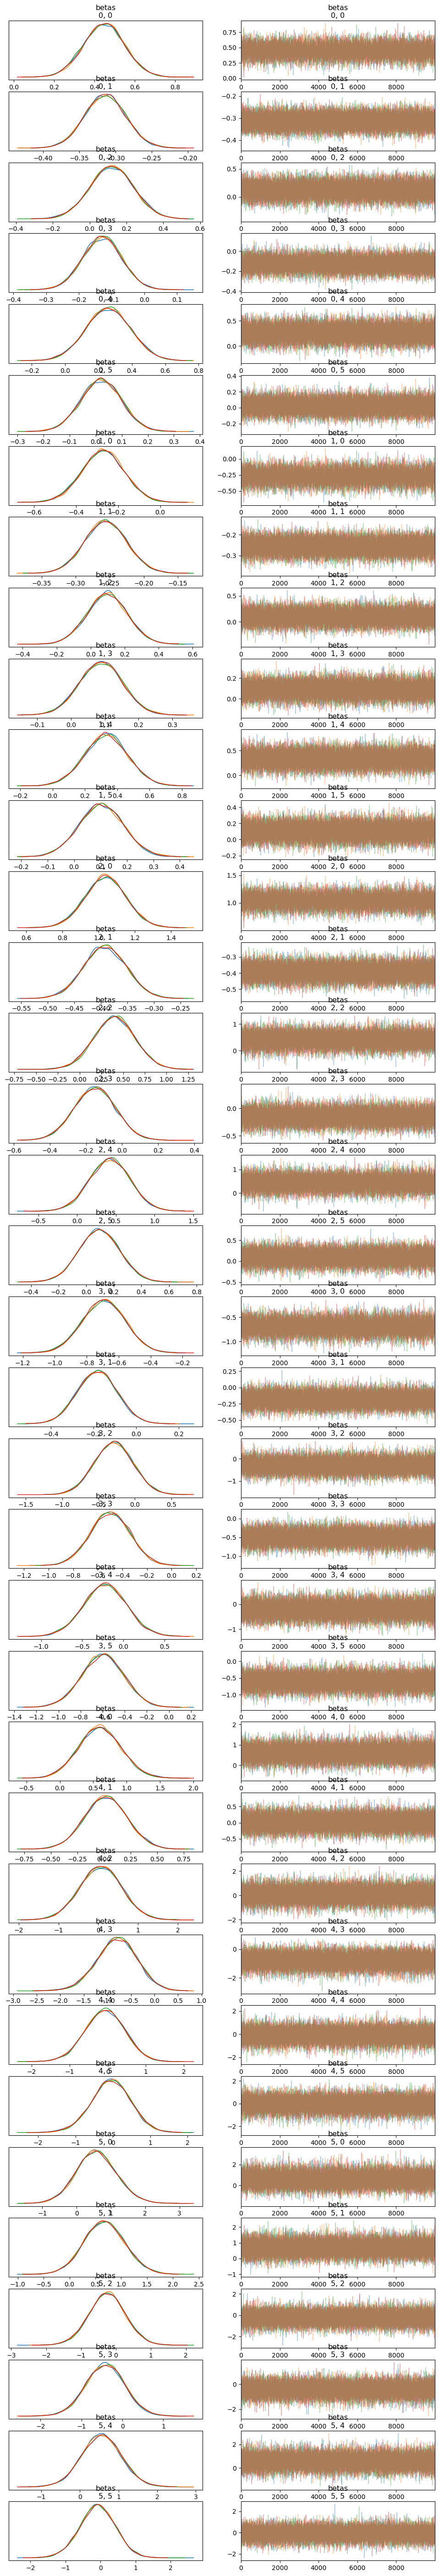

In [28]:
az.rcParams["plot.max_subplots"] = 100

az.plot_trace(fit_clus_az,var_names=["betas"],
              compact = False
             )
plt.show()

In [36]:
az.waic(fit_clus, scale="negative_log")

/home/daan/.local/lib/python3.10/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 40000 posterior samples and 106 observations log-likelihood matrix.

           Estimate       SE
-elpd_waic     3.28    28.96
p_waic       252.90        -

There has been a warning during the calculation. Please check the results.

In [37]:
az.loo(fit_clus, scale="negative_log")

/home/daan/.local/lib/python3.10/site-packages/arviz/stats/stats.py:1037: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/home/daan/.local/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 40000 posterior samples and 106 observations log-likelihood matrix.

          Estimate       SE
-elpd_loo    61.40    30.31
p_loo       311.03        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          2    1.9%
   (0.7, 1]   (bad)        86   81.1%
   (1, Inf)   (very bad)   18   17.0%

In [29]:
betas = fit_clus.betas
betas.shape
beta_means = np.zeros((P+1,n_clusters))

for c in range(P+1):
    for j in range(n_clusters):
        beta_means[c,j] = np.mean(betas[:,j,c])
        
        
np.savetxt("beta_means.txt",beta_means)
beta_means

array([[ 0.44720561, -0.27356143,  1.03739466, -0.6940283 ,  0.59392047,
         0.57466922],
       [-0.31418893, -0.25606285, -0.39201629, -0.18320936,  0.01543967,
         0.67218993],
       [ 0.11868443,  0.09855555,  0.40253066, -0.29472722,  0.06360879,
        -0.25065797],
       [-0.12903412,  0.08776327, -0.15214463, -0.49703659, -0.79203558,
        -0.41505128],
       [ 0.25712101,  0.33384285,  0.42575967, -0.22365769, -0.07167519,
         0.56324355],
       [ 0.02131862,  0.10050507,  0.09384927, -0.59669519, -0.04766805,
        -0.08022647]])

In [34]:
for j in range(n_clusters):
    filename = "betas_cluster_"+str(j+1)+".csv"
    header = ["intercetta","età_madri","inatt_donne","inatt_uomini","occup_donne","occup_uomini"]
    df = pd.DataFrame(betas[:,j,:])
    df.to_csv(filename, header=header)

In [37]:
ws = fit_clus.ws
# for j in range(n_clusters):
#     filename = "ws_cluster_"+str(j+1)+".csv"
#     header = ["intercetta","età_madri","inatt_donne","inatt_uomini","occup_donne","occup_uomini"]
#     df = pd.DataFrame(ws[:,j,:])
#     df.to_csv(filename, header=header)

ws.shape

(40000, 10, 106)

In [33]:
X_r[74,4,:]

array([ 1.        ,  0.07280008, -1.12089884, -1.00323404,  1.14367743,
        0.93718533])

In [34]:
y[74,:]

array([2.36841198, 2.28710233, 2.28710233, 1.79924444, 1.96186374,
       1.63662514, 1.3926962 , 1.06745761, 0.82352866, 0.33567077])